# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split

# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))



from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

#Además se establece un estilo de colores para todos los gráficos
plt.style.use('ggplot')
#Para volver a default utilizar lo siguiente:
# plt.rcdefaults()

In [3]:
data_2017 = pd.read_csv('flujo-vehicular-2017.csv')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv') 

In [4]:
data_2017.info()
data_2017

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


In [5]:
data_2018.info()
data_2018

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115
...,...,...,...,...,...,...,...,...,...,...
1375903,2018,2018-12-31,21,22,Lunes,Sarmiento,Provincia,Liviano,TELEPASE,62
1375904,2018,2018-12-31,21,22,Lunes,Sarmiento,Provincia,Pesado,TELEPASE,1
1375905,2018,2018-12-31,22,23,Lunes,Sarmiento,Provincia,Liviano,NO COBRADO,3
1375906,2018,2018-12-31,22,23,Lunes,Sarmiento,Provincia,Liviano,TELEPASE,13


In [6]:
data_2019.info()
data_2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print('2019',data_2019['estacion'].unique())
print('')
print('2018',data_2018['estacion'].unique())
print('')
print('2017',data_2017['estacion'].unique())

2019 ['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']

2018 ['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

2017 ['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

print(dataset.shape)
dataset.head()

(238869, 6)


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


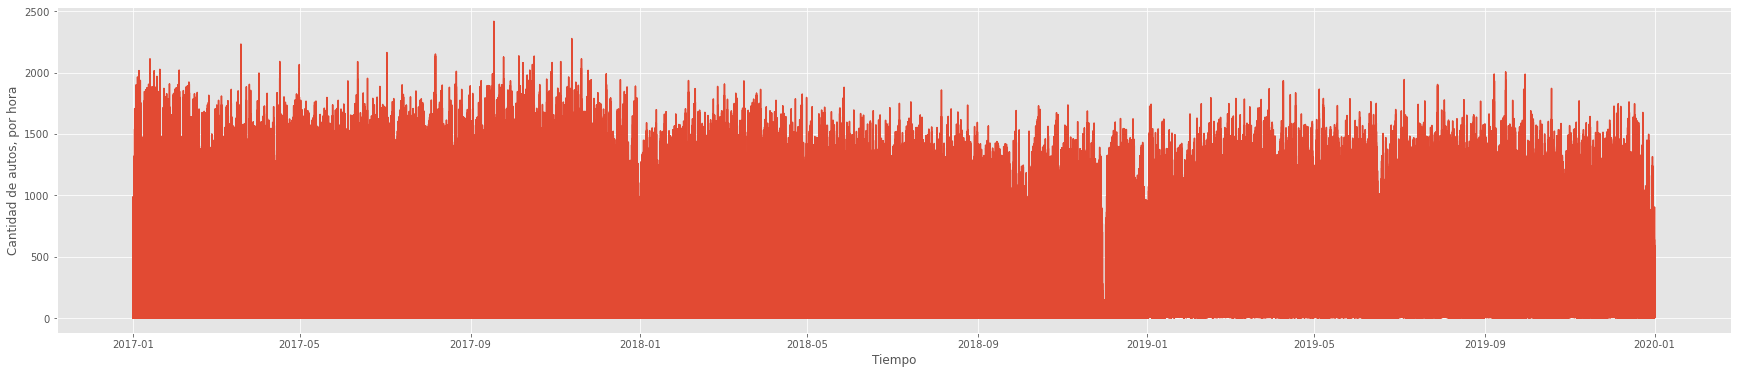

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (30,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [16]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


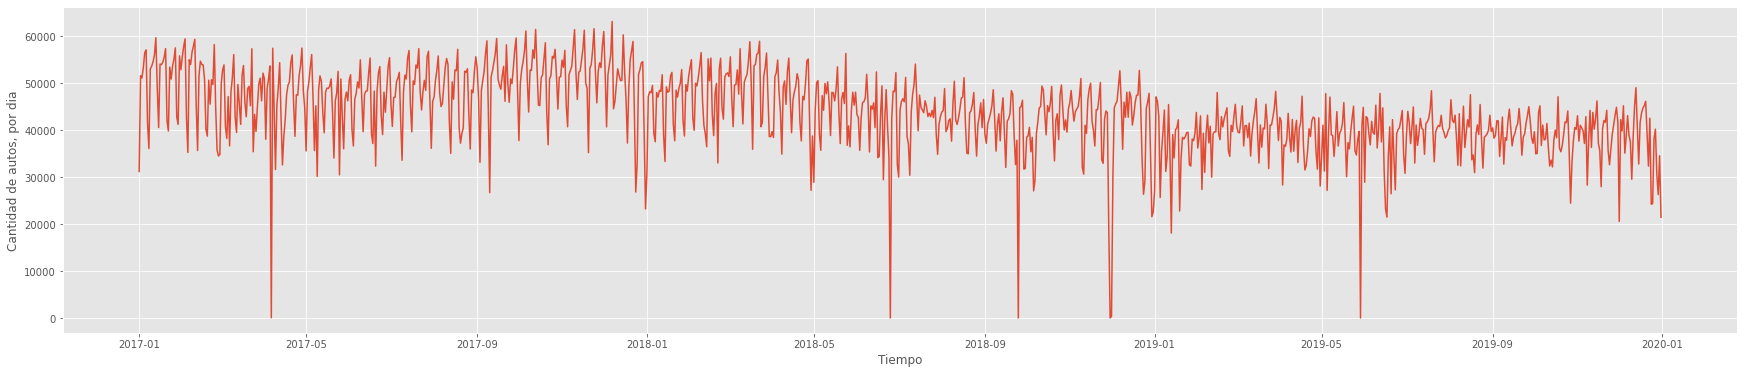

In [17]:
plt.figure(figsize = (30,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [18]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
hora = dataset.resample('H', on = 'fecha').sum()
print(hora.shape)
hora.head()

(26280, 1)


,cantidad_pasos
fecha,
2017-01-01 00:00:00,1576
2017-01-01 01:00:00,1
2017-01-01 02:00:00,1374
2017-01-01 03:00:00,1734
2017-01-01 04:00:00,1247


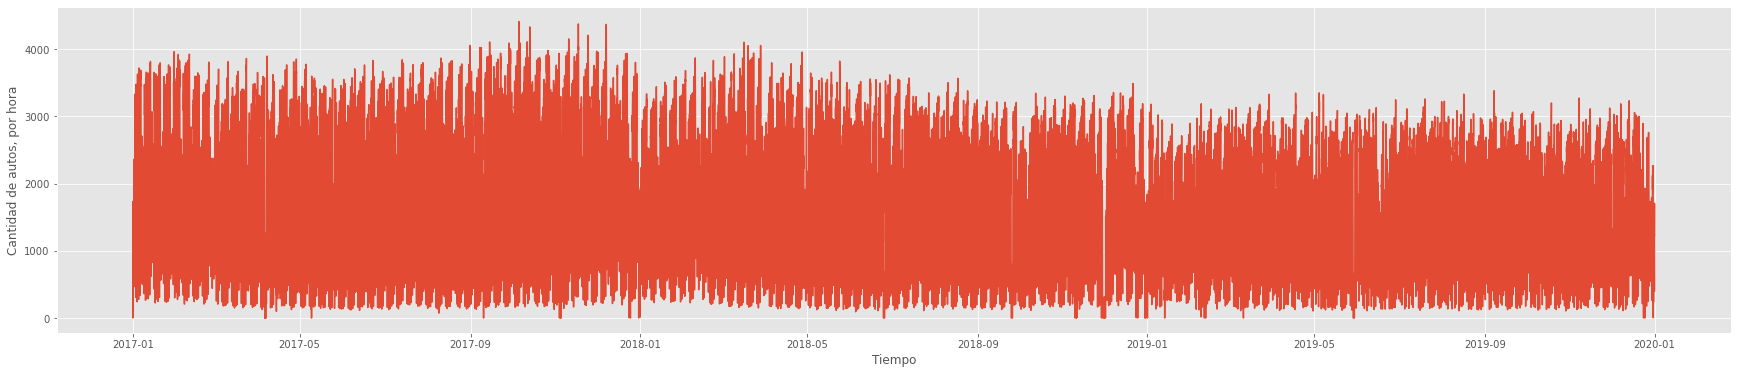

In [19]:
plt.figure(figsize = (30,6))
plt.plot(hora.index, hora.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

---

<br />
<br />

# ANÁLISIS EXPLORATORIO DE DATOS
<br />
<br />

---

## Recordemos los datasets

Se tiene 4 datasets, uno por cada año, más el dataset que agrupa los tres años filtrado por estación y por tipo depago.

In [20]:
print('Shape 2017: ', data_2017.shape)
print('Shape 2018: ', data_2018.shape)
print('Shape 2019: ', data_2019.shape)
print('Shape Total (Illia / Efectivo): ', dataset.shape)

Shape 2017:  (1372645, 10)
Shape 2018:  (1375908, 10)
Shape 2019:  (812153, 10)
Shape Total (Illia / Efectivo):  (238869, 5)


**Consideremos el dataset completo para realiar el EDA**

In [21]:
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


El dataset contiene 238.869 celdas con 5 columnas. Este dataset viene de concatenar tres años de data (2017, 2018 y 2019), y de haberle aplicado filtros por estación ('Illia ) y forma de pago (efectivo). \
No está sampleado, sólo está filtrado, por lo que podemos considerar este dataset como nuestro dataset inicial para realizar la exploración. \
La información está por hora, se espera resamplear para ver tendencias por día, mes y año. \
Además no se descarta volver a utilizar la información de raíz (sin filtrar) para ver detalles de las otras columnas y su influencia sobre los modelos.

## Valores Unicos

In [23]:
unique = dataset.nunique()
unique

dia                   7
sentido               2
tipo_vehiculo         2
cantidad_pasos     1967
fecha             26102
dtype: int64

In [24]:
dataset['dia'].unique()

array(['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
       'Sábado'], dtype=object)

Como es de esperarse, todos los dias de la semana están presentes

In [25]:
dataset['sentido'].unique()

array(['Provincia', 'Centro'], dtype=object)

Existen dos unicos sentidos, Provincia y Centro

In [26]:
dataset['tipo_vehiculo'].unique()

array(['Pesado', 'Liviano'], dtype=object)

Existen dos tipos de vehiculos: Liviano y Pesado


No tiene sentido revisar valores unicos de pases y fecha, ya que se esperan tener muchos valores de estos items.

## Valores Nulos

In [27]:
def null_det(df):
    df_nulo = df.isnull().sum().sort_values(ascending =False)[df.isnull().sum()>0]
    df_nulo = pd.DataFrame({'Nombre_de_columna_con_Nulos':df_nulo.index,'Cant_de_Nulos':df_nulo.values})
    df_nulo['% de Nulos'] = round(((df_nulo.Cant_de_Nulos/df.shape[0])*100),2)
    return(df_nulo)

In [28]:
null_det(dataset)

,Nombre_de_columna_con_Nulos,Cant_de_Nulos,% de Nulos


No se tienen valores nulos en el dataset.\
Vamos a revisar los dataset de cada año para descartar que se hayan habido nulos antes de hacer el concatenado:

In [29]:
null_det(data_2017)

,Nombre_de_columna_con_Nulos,Cant_de_Nulos,% de Nulos


In [30]:
null_det(data_2018)

,Nombre_de_columna_con_Nulos,Cant_de_Nulos,% de Nulos


In [31]:
null_det(data_2019)

,Nombre_de_columna_con_Nulos,Cant_de_Nulos,% de Nulos


Se observa como no hay nulos en los datasets originales por año.

## Outliers

Resampliamos por dia para analizar valores atípicos diarios, ya que por hora no tendría mucho sentido de analizar:

In [32]:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [33]:
diario.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


Text(0.5, 1.0, 'Pasos por Día')

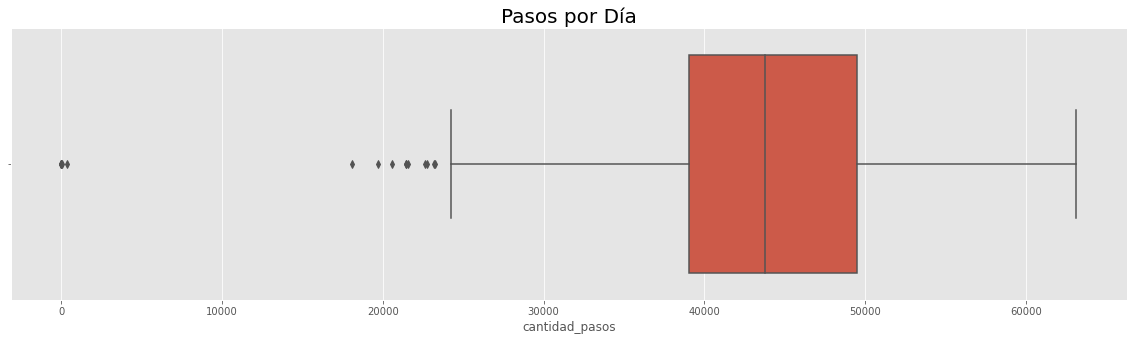

In [34]:
plt.figure(figsize=(20,5))
sns.boxplot(diario.cantidad_pasos)
plt.title("Pasos por Día", fontsize=20)

Graficamente se obervan algunos valores por debajo del outlier inferior.\
Determinemos el outlier inferior y cuanto representan estos en la data.

In [35]:
Q1 = diario['cantidad_pasos'].quantile(0.25)
Q2 = diario['cantidad_pasos'].quantile(0.50)
Q3 = diario['cantidad_pasos'].quantile(0.75)


IQR = Q3 - Q1

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
low_lim

23406.75

Se tiene como outlier inferior el valode 23406

In [36]:
menores_que_outlier = diario.loc[diario['cantidad_pasos']<low_lim]
porcentaje_menores_que_outlier = 100*menores_que_outlier.count()/diario.count()
porcentaje_menores_que_outlier

cantidad_pasos    1.461187
dtype: float64

In [37]:
diario = diario[diario.cantidad_pasos > low_lim]
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-26,38168
2019-12-27,40182
2019-12-28,30681


Continuemos con este dataset habiendo eliminado los outliers

## Distribuciones

Para el analizis de las distribuciones tenemos que trabajar con los datasets de cada año. Esto para poder ver en mejor detalle la distribución de cada item.

Enfoquemosno en:\
-Estacion (categórica)\
-Sentido (categórica)\
-Tipo de Vehiculo (categórica)\
-Forma de Pago (categórica)
-Cantidad de Pases (numérica)

### Categóricas

In [38]:
def plot_cat(cat, y_lim):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.countplot(data_2017[cat])
    plt.title(f'Distribución de {cat} del Año 2017', size=13, fontweight='bold')
    plt.xticks(rotation=90, size=10)
    plt.ylim(0,y_lim)
    plt.subplot(1,3,2)
    sns.countplot(data_2018[cat])
    plt.title(f'Distribución de {cat} del Año 2018', size=13, fontweight='bold')
    plt.xticks(rotation=90, size=10)
    plt.ylim(0,y_lim)
    plt.subplot(1,3,3)
    sns.countplot(data_2019[cat])
    plt.title(f'Distribución de {cat} del Año 2019', size=13, fontweight='bold')
    plt.xticks(rotation=90, size=10)
    plt.ylim(0,y_lim)
    plt.tight_layout()

**Estación**

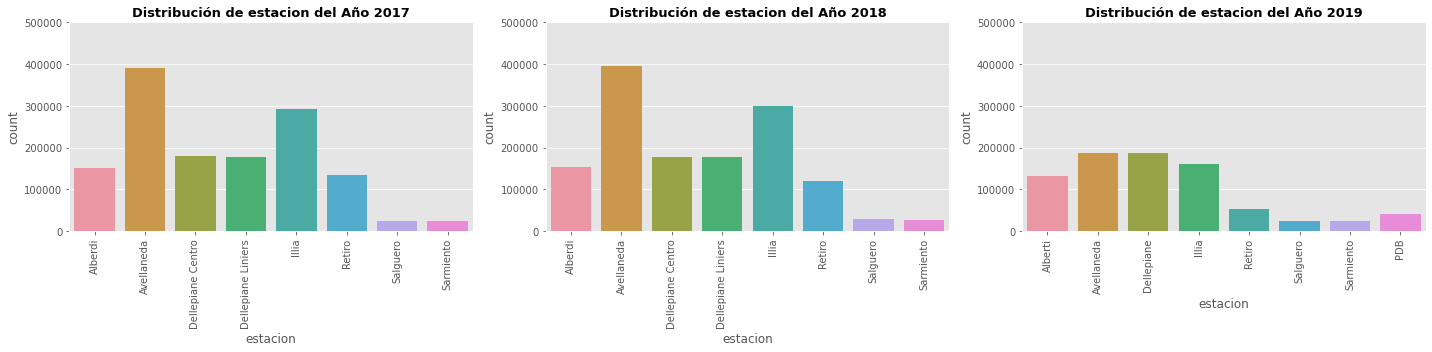

In [39]:
plot_cat('estacion', 500000)

Se observa que la más concurrida en todos los anños es Avellaneda. Siendo la Illia la segunda. Además se ven diferencias entre los dos primeros años y el 2019, donde se redducen los pases de unos 400.000 que presentaba avellaneda a unos 175.000, menos de la mitad. Probablemente al efecto pandemia.

**Sentido**

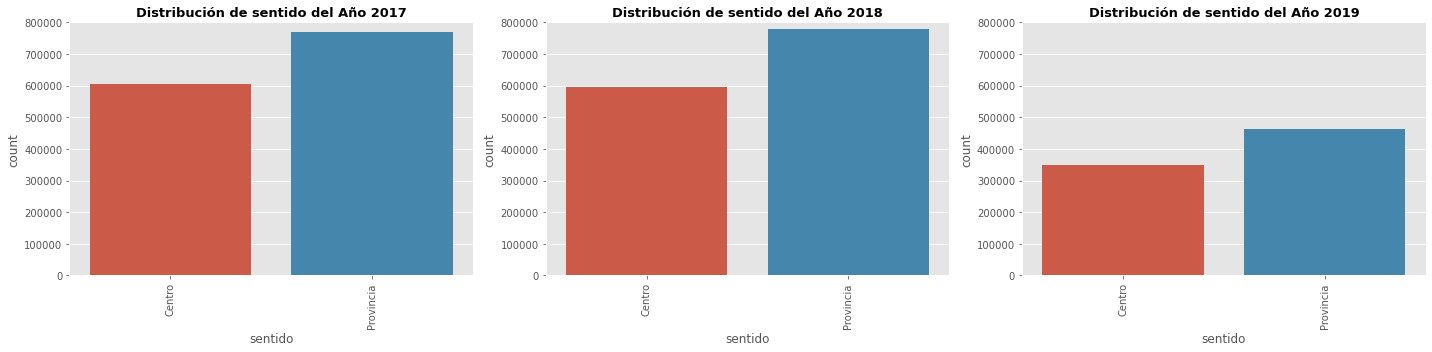

In [40]:
plot_cat('sentido', 800000)

Se observan mas pases hacia provincia que hacia centro. Y análogamente al sentido, menos pases en el año 2019.

**Tipo de Vehículo**

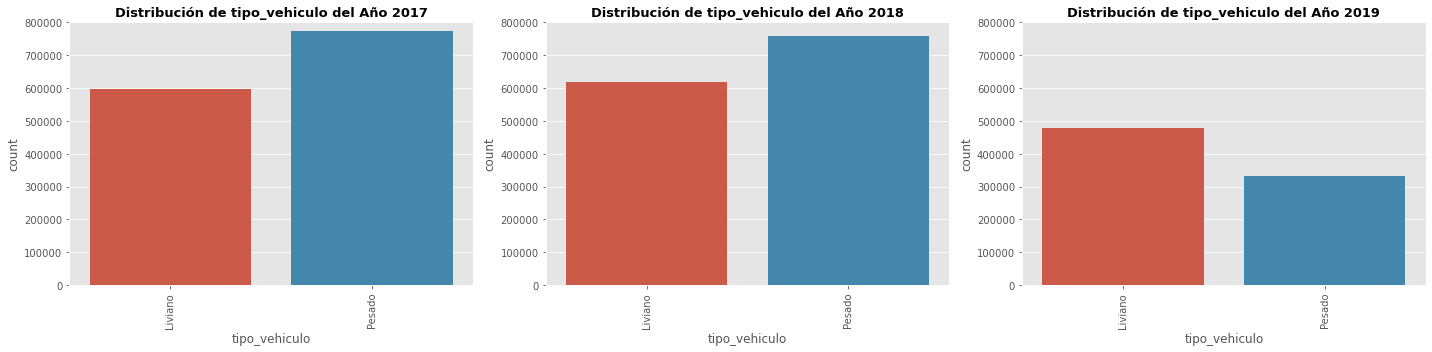

In [41]:
plot_cat('tipo_vehiculo', 800000)

Se observan más pases de vehículos pesados en los años 2017 y 2018, pero esto se invierte en el 2019. Hasta ahora se nota como el año 2019 viene presentando patrones distintos a los años anteriores, posiblemente debido a la pandemia. Esto seguro afectará de forma negativa la eficiencia de los modelos aplicados.

**Forma de Pago**

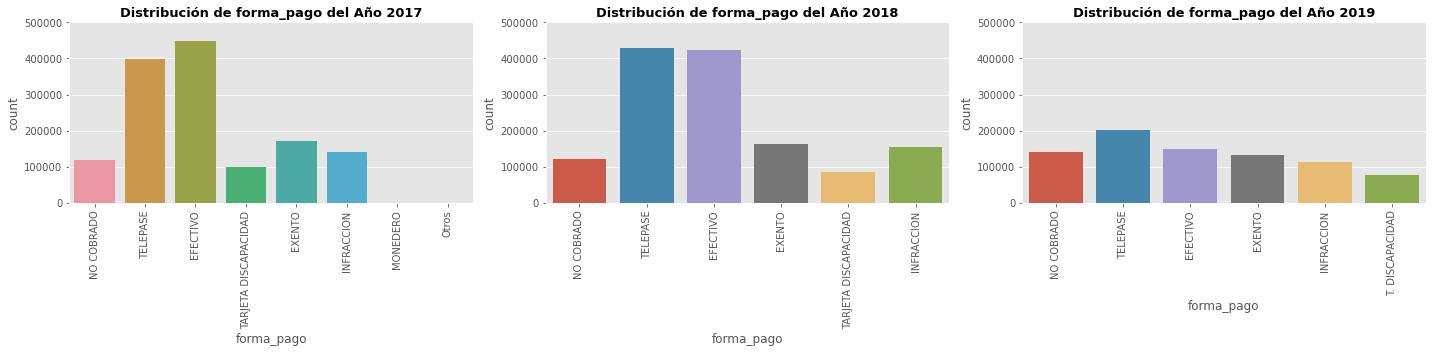

In [42]:
plot_cat('forma_pago', 500000)

La forma de pago efectivo dominaba en el 2018, pero el Telepase fue aumentando de incidencia, tal vez debido a a tendencia de usar menos efectivo y utilizar más las herramientas digitales.

### Numéricas

**Cantidad de Pasos**\
Usemos el dataset concatenado, para tener cantidad de pasos diarios

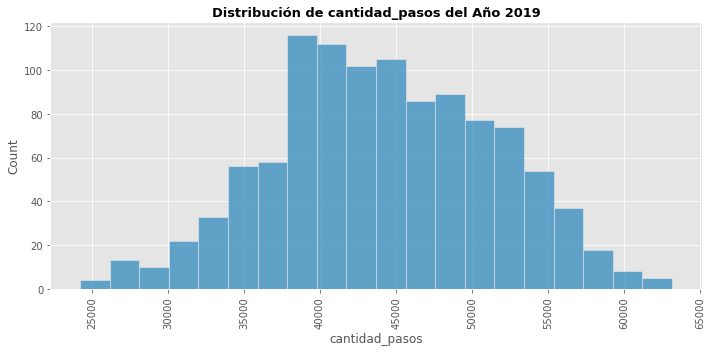

In [43]:
plt.figure(figsize=(10,5))

cat = 'cantidad_pasos'
sns.histplot(diario[cat])
plt.title(f'Distribución de {cat} del Año 2019', size=13, fontweight='bold')
plt.xticks(rotation=90, size=10)
plt.tight_layout()

Se observa que la cantidad de pasos mas comunes son entre 40.000 y 50.000 por día.

## Descomposición de la seria

Echemos un vistazo a la descomposición de esta seria de tiempo. Enfoquemosno en sus tres partes más importantes:\
    - Trend (Tendencia)\
    - Seasonality (Estacionalidad)\
    - Ruido (Residual/Noise)

Tomemos el dataset concatenado. Por ahora no hagamos la separación de train/test, ésta se hará en la aplicación de los modelos de machine learning.

Recordemos el dataset a utilizar:

In [44]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-26,38168
2019-12-27,40182
2019-12-28,30681


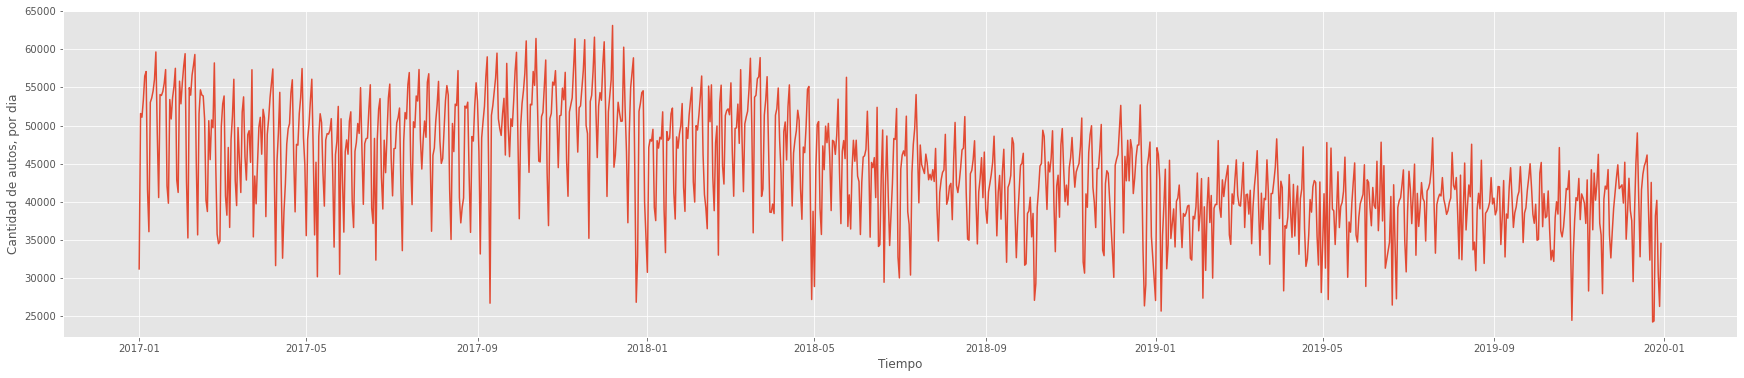

In [45]:
plt.figure(figsize = (30,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### Tendencia

Comenzemos suponiendo tendencia lineal, para obternerla apliquemos lo siguiente:

Preparemos la data, pasando la fecha a numero entero de forma de poder aplicarle la regresión lienal:

In [46]:
diario_trend = diario.copy()
diario_trend['fecha_enteros'] = diario.index.map(datetime.datetime.toordinal)
diario_trend

,cantidad_pasos,fecha_enteros
fecha,,
2017-01-01,31183,736330
2017-01-02,51568,736331
2017-01-03,51093,736332
2017-01-04,53332,736333
2017-01-05,56486,736334
...,...,...
2019-12-26,38168,737419
2019-12-27,40182,737420
2019-12-28,30681,737421


Ahora apliquemos la regresión:

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario_trend.fecha_enteros.values.reshape(-1, 1), diario_trend.cantidad_pasos)

LinearRegression()

In [48]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(diario_trend.fecha_enteros.values.reshape(-1, 1), diario_trend.cantidad_pasos)
reg.score(diario_trend.fecha_enteros.values.reshape(-1, 1), diario_trend.cantidad_pasos)
print('Pendiente: ', reg.coef_)

Pendiente:  [-12.33042885]


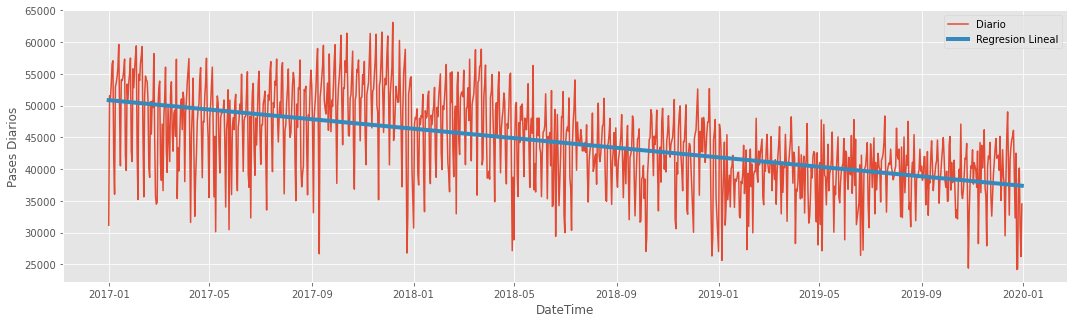

In [49]:
plt.figure(figsize = (18,5))
plt.plot(diario_trend.index, diario_trend.cantidad_pasos, label = 'Diario')
plt.plot(diario_trend.index, reg.predict(diario_trend.fecha_enteros.values.reshape(-1, 1)), lw = 4, label = 'Regresion Lineal')
plt.xlabel('DateTime')
plt.ylabel('Pases Diarios')
plt.legend()
plt.show()

Se observa una tendencia a bajar la cantidad de pases. Pero una tendencia linea puede ser engañosa ya que no muestra fluctuaciones intermedias. Por cuestiones didácticas mantengamos esta tendencia pero se pueden investigar otras regresiones que sean más acordes.

### Descomposición de la serie de tiempo

# MODELOS DE MACHINE LEARNING

## Separación Train/Test

Apartemos los dos últimos meses 

In [50]:
size = 61

train, test = train_test_split(diario, test_size = size/len(diario), shuffle=False)

In [51]:
print(train)

            cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486
...                    ...
2019-10-25           44064
2019-10-26           35475
2019-10-27           24434
2019-10-28           33081
2019-10-29           37630

[1018 rows x 1 columns]


In [1]:
print(test)

NameError: name 'test' is not defined

## Descomposición de la serie

Antes de trabajar con los modelos, analizemos un poco la descomposición de la serie

### Trend (Tendencia)

In [ ]:
media_movil = diario.rolling(
    window=365,
    center=True,
    min_periods= 183
).mean()

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Pasos Diarios')
plt.plot(media_movil, lw = 4, label = 'Media Móvil(365)')
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')
plt.legend()
plt.show()

### Seasonality (Estacionalidad)

#### Method 1 - Differencing and Seasonal Differencing

NameError: name 'diario_semana' is not defined

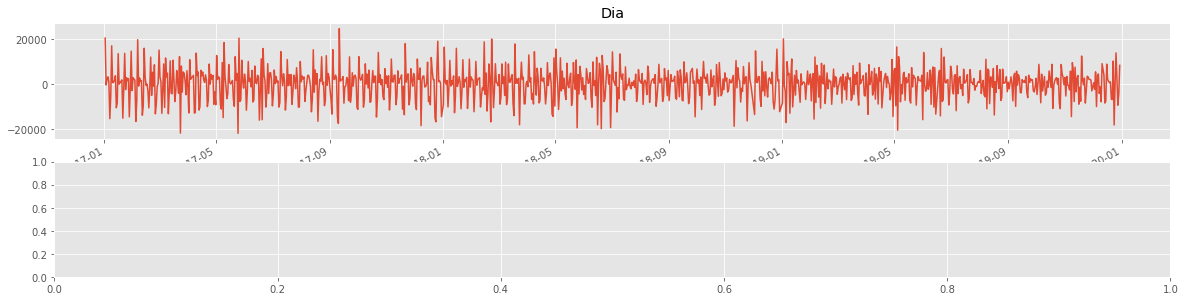

In [66]:
diario_dia = diario.copy()

plt.figure(figsize=(20,8))

ax1 = plt.subplot(3,1,1)
diario_dia['pasos_diff'] = diario_dia['cantidad_pasos'] - diario_dia['cantidad_pasos'].shift(1)
diario_dia['pasos_diff'].plot()
plt.title('Dia')

ax2 = plt.subplot(3,1,2)
diario_semana['pasos_diff'] = diario_semana['cantidad_pasos'] - diario_semana['cantidad_pasos'].shift(7)
diario_semana['pasos_diff'].plot()
plt.title('Semana')

ax3 = plt.subplot(3,1,3)
diario_mes['pasos_diff'] = diario_mes['cantidad_pasos'] - diario_mes['cantidad_pasos'].shift(30)
diario_mes['pasos_diff'].plot()
plt.title('Mes')

#### Method 2. Transformation

In [256]:
diario_transf = diario.copy()

#calculate the log
diario_transf['adj_log'] = np.log(diario_transf['cantidad_pasos'])

#calculate the log
diario_transf['adj_sqrt'] = np.sqrt(diario_transf['cantidad_pasos'])

#calculate the log
diario_transf['adj_cbrt'] = np.cbrt(diario_transf['cantidad_pasos'])

Text(0.5, 1.0, 'Cubic Root')

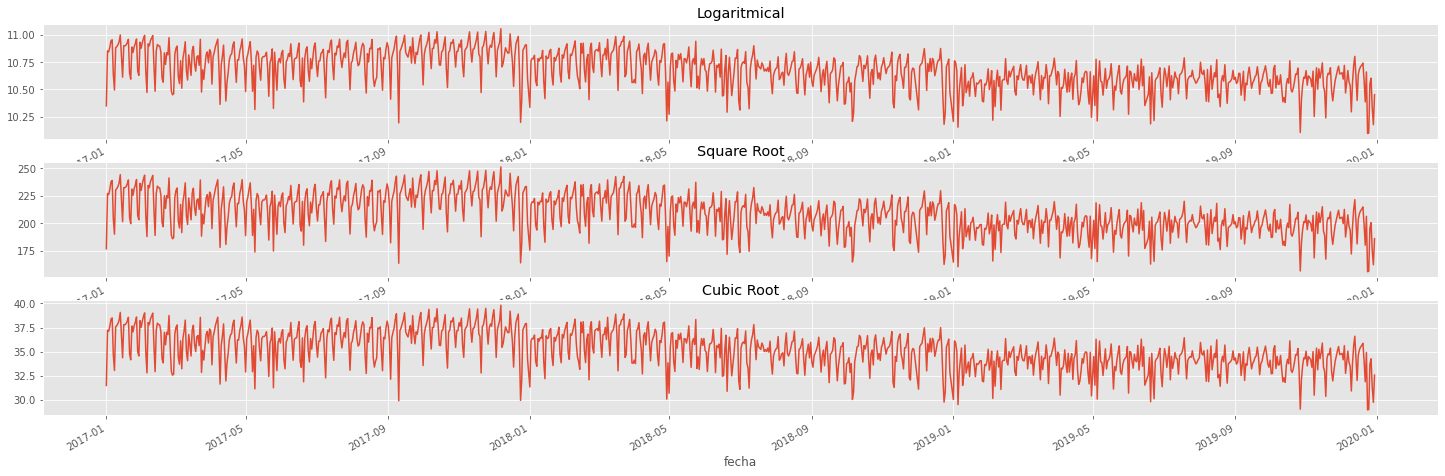

In [266]:
plt.figure(figsize=(25,8))

ax1 = plt.subplot(3,1,1)
diario_transf['adj_log'].plot()
plt.title('Logaritmical')
ax2 = plt.subplot(3,1,2)
diario_transf['adj_sqrt'].plot()
plt.title('Square Root')
ax2 = plt.subplot(3,1,3)
diario_transf['adj_cbrt'].plot()
plt.title('Cubic Root')


Agreganfo diferencial a las transformaciones:

In [280]:
#calculate the log
diario_transf['diff_adj_log'] = diario_transf['adj_log'] - diario_transf['adj_log'].shift(7)

#calculate the log
diario_transf['diff_adj_sqrt'] = diario_transf['adj_sqrt'] - diario_transf['adj_sqrt'].shift(7)

#calculate the log
diario_transf['dif_adj_cbrt'] = diario_transf['adj_cbrt'] - diario_transf['adj_cbrt'].shift(7)

Text(0.5, 1.0, 'Cubic Root')

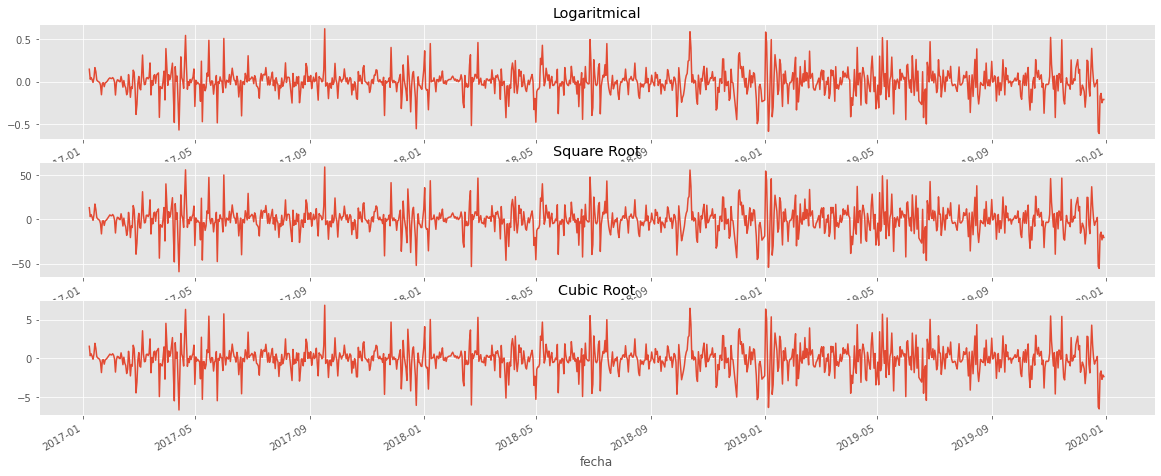

In [297]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(3,1,1)
diario_transf['diff_adj_log'].plot()
plt.title('Logaritmical')
ax2 = plt.subplot(3,1,2)
diario_transf['diff_adj_sqrt'].plot()
plt.title('Square Root')
ax2 = plt.subplot(3,1,3)
diario_transf['dif_adj_cbrt'].plot()
plt.title('Cubic Root')

#### Method 3: Rolling Statistic

<AxesSubplot:xlabel='fecha'>

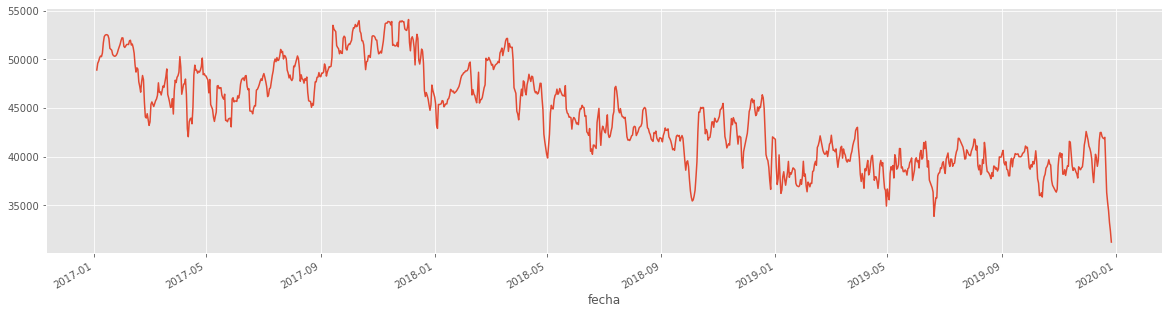

In [296]:
diario_rolling = diario.copy()
diario_rolling['mov_avg_7'] = diario_rolling['cantidad_pasos'].rolling(window=7, center=True).mean()
plt.figure(figsize=(20,5))
diario_rolling['mov_avg_7'].plot()

<AxesSubplot:xlabel='fecha'>

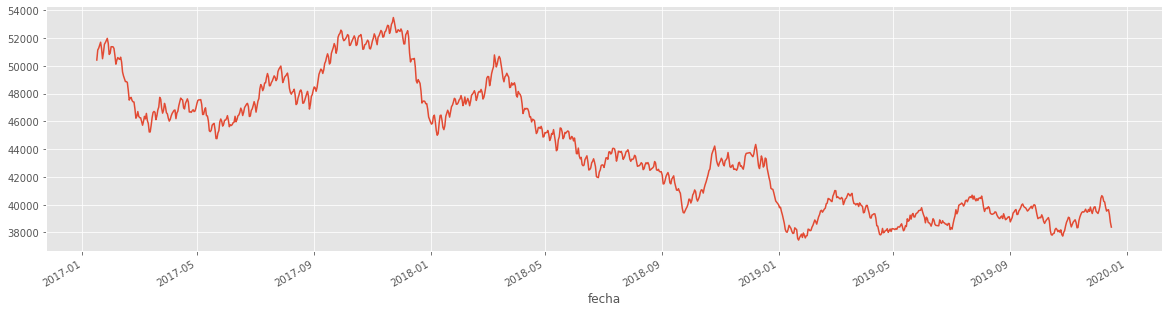

In [298]:
diario_rolling = diario.copy()
diario_rolling['mov_avg_30'] = diario_rolling['cantidad_pasos'].rolling(window=30, center=True).mean()
plt.figure(figsize=(20,5))
diario_rolling['mov_avg_30'].plot()

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(diario['cantidad_pasos'])

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [173]:
my_serie = diario['cantidad_pasos'].squeeze()

In [174]:
my_serie

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
              ...  
2019-12-26    38168
2019-12-27    40182
2019-12-28    30681
2019-12-29    26259
2019-12-30    34523
Name: cantidad_pasos, Length: 1079, dtype: int64

In [162]:
diario.drop(columns={'fecha_enteros'}, inplace=True)

In [169]:
diario['cantidad_pasos']

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
              ...  
2019-12-26    38168
2019-12-27    40182
2019-12-28    30681
2019-12-29    26259
2019-12-30    34523
Name: cantidad_pasos, Length: 1079, dtype: int64

<Figure size 720x720 with 0 Axes>

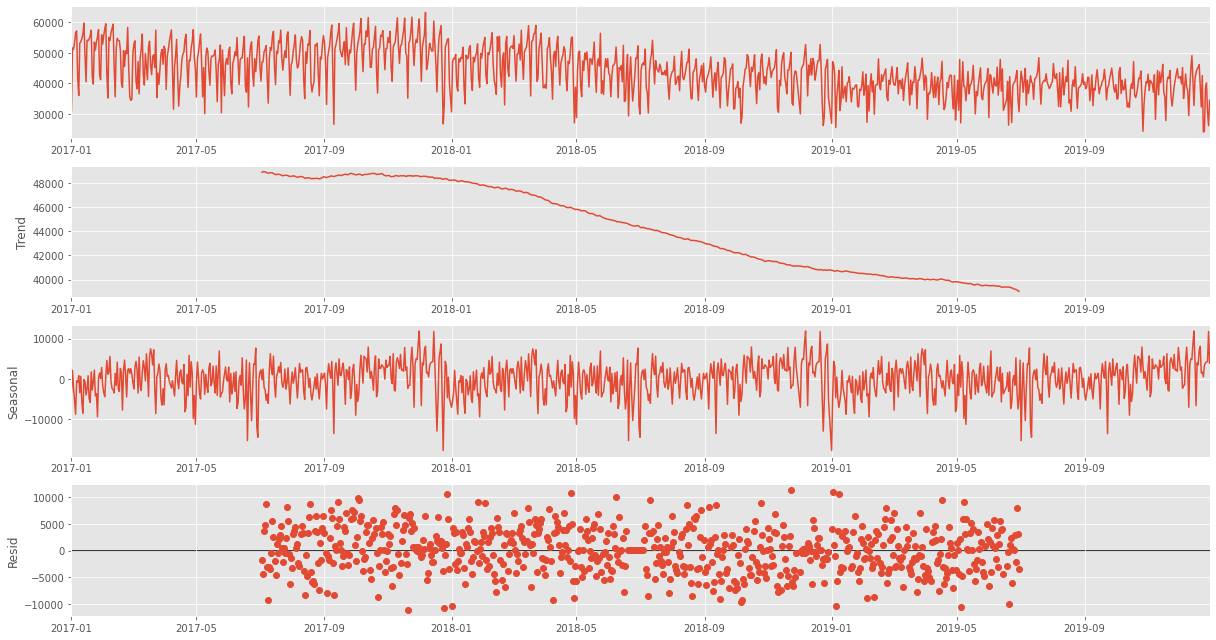

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(10,10))
result = seasonal_decompose(diario, model='additive', freq=365)
fig = result.plot()
fig.set_size_inches((17, 9))
fig.tight_layout()
plt.show()


<Figure size 720x720 with 0 Axes>

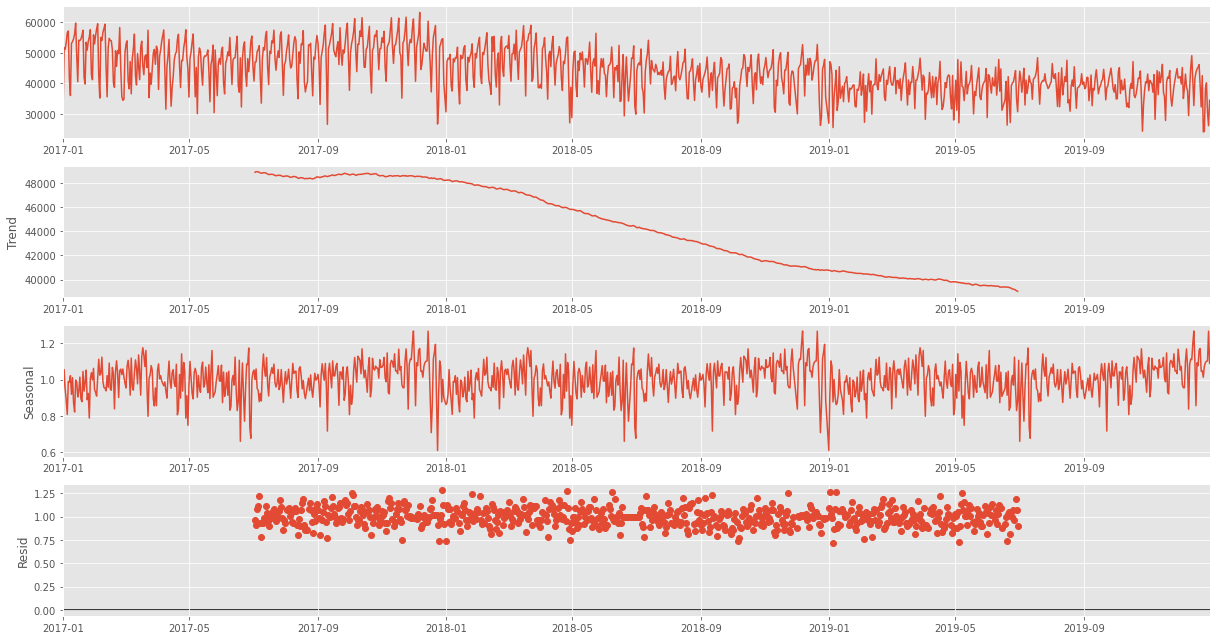

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(10,10))
result = seasonal_decompose(diario, model='multiplicative', freq=365)
fig = result.plot()
fig.set_size_inches((17, 9))
fig.tight_layout()
plt.show()

### Ciclos

## Arima

Cheueamos que el index es la fecha:

In [186]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-26,38168
2019-12-27,40182
2019-12-28,30681


## AutoArima

## Prophet

### Optimizando

## Revisando otros datasets

### 2020

### Previous Years

Asigemos las columnas para poder usar Prophet

In [ ]:
df_dia['ds'] = df_dia.index
df_dia.rename(columns={'cantidad_pasos':'y'}, inplace=True)
df_dia

Apartamos los últimos 2 meses para usarlos como test

In [ ]:
size = 61

train, test = train_test_split(df_dia, test_size = size/len(df_dia), shuffle=False)

Chequeamos train y test

In [ ]:
print(train)
print(test)

# INVESTIGACION

# REQUERIMIENTOS ADICIONALES

## Cambios en las formas de pago

# VEAMOS DONDE UBICAMOS ESTO...

## Prophet Benchmark

Creamos el modelo benchamrk, solo pasemos como argumento yearly_seasonality, debido a que trabajamos con año calendario, y se espera ver un patrón por año.

In [ ]:
model = Prophet(yearly_seasonality=True)
model.fit(train)

Ahora generamos los días a predecir en un nuevo dataframe

In [ ]:
future = model.make_future_dataframe(periods=61)
future

Realizamos las predicciones

In [ ]:
forecast = model.predict(future)
forecast.head()

Revisamos las graficas

In [ ]:
model.plot_components(forecast)

Extraemos la parte predicha de 61 días

In [ ]:
pred = forecast.iloc[-61: , :]
len(pred)

Grafiquemos 

In [ ]:
# test results
plt.figure(figsize=(23,8))
plt.plot(test['ds'], test['y'], color='blue', label='Real')
plt.plot(pred['ds'], pred['yhat'], color= 'red', label='Predicción')
plt.plot(pred['ds'], pred['yhat_lower'], color= 'green', label='min')
plt.plot(pred['ds'], pred['yhat_upper'], color= 'black', label = 'max')
plt.title('Conteo de Autos por dia', fontsize=16)
plt.legend(fontsize=14)
plt.show()

Grafiquemos la dispersión total

In [ ]:
model.plot(forecast, figsize=(23,7))
plt.show()

## Cross Validation

In [ ]:
# df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
# df_cv = cross_validation(model, horizon = '30 days') initial = 100, period = 100, horizon = 100, units = 'days'
df_cv = cross_validation(model, initial='730 days', period='30 days', horizon = '30 days')

In [ ]:
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
dir(Prophet)

In [ ]:
# df_dia

## Hyperparameter tuning

In [ ]:
import itertools
import numpy as np
import pandas as pd
import datetime
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

#Tomamos el inicio de la iteración:
start = datetime.datetime.now()

#define dataframe
df = df_dia

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5], #[0.001, 0.01, 0.1, 0.5]
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],#[0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=0.1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)


#Tomamos el final de la iteración y calculamos la duración:
end = datetime.datetime.now()
duration = end-start
print('Duration: ', duration)



#************Results**************#******************************************************

# Iteration #1***************************************************************************
# param_grid = {  
#     'changepoint_prior_scale': [ 0.1, 0.5], 
#     'seasonality_prior_scale': [0.1, 1.0],
#    changepoint_prior_scale  seasonality_prior_scale         rmse
# 0                      0.1                      0.1  6999.461364
# 1                      0.1                      1.0  6993.391599
# 2                      0.5                      0.1  6859.343351
# 3                      0.5                      1.0  6858.507958
# Duration:  0:02:09.216319

# Iteration #2***************************************************************************
# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5], #[0.001, 0.01, 0.1, 0.5]
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],#[0.01, 0.1, 1.0, 10.0]
#     changepoint_prior_scale  seasonality_prior_scale         rmse
# 0                     0.001                     0.01  7790.430509
# 1                     0.001                     0.10  8203.856244
# 2                     0.001                     1.00  8561.270370
# 3                     0.001                    10.00  8415.522620
# 4                     0.010                     0.01  7100.758827
# 5                     0.010                     0.10  7308.645256
# 6                     0.010                     1.00  7301.228537
# 7                     0.010                    10.00  7291.460254
# 8                     0.100                     0.01  6728.169320
# 9                     0.100                     0.10  6999.461364
# 10                    0.100                     1.00  6993.391599
# 11                    0.100                    10.00  7013.133949
# 12                    0.500                     0.01  6586.687638
# 13                    0.500                     0.10  6859.343351
# 14                    0.500                     1.00  6858.507958
# 15                    0.500                    10.00  6865.651645
# Duration:  0:13:07.296182
# Best params
# {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}

In [ ]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

---

<br />
<br />

# XX
<br />
<br />

---

In [ ]:
df.info()

In [ ]:
#EDA 
plt.figure(figsize=(20,7))
plt.plot(df['fecha'], df['cantidad_pasos'])
plt.show()

In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
hora = dataset.resample('H', on = 'fecha').sum()
print(hora.shape)

plt.figure(figsize = (23,6))
plt.plot(hora.index, hora.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [ ]:
diario.info()

In [ ]:
df = hora
df

## Format data for the model

In [ ]:
# df.index = df['fecha']
# df['y'] = df['cantidad_pasos']
# df.drop(columns=['cantidad_pasos'], axis=1, inplace=True)
df = df.resample('D').sum()
# df.rename(columns={'fecha':'Datetime'})
df.head()

In [ ]:
df['ds'] = df.index
df.head()

In [ ]:
df.tail()

In [ ]:
size = 60 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = size/len(df), shuffle=False)

In [ ]:
train.tail()

In [ ]:
test.head()

## Model Training

In [ ]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

In [ ]:
future = model.make_future_dataframe(periods=60)
future

In [ ]:
forecast = model.predict(future)
forecast.head()

model.plot_components(forecast)

In [ ]:
model.plot_components(forecast)

In [ ]:
pred = forecast.iloc[-60: , :]
len(pred)

In [ ]:
# test results
plt.figure(figsize=(25,7))
plt.plot(test['ds'], test['y'], color='blue')
plt.plot(pred['ds'], pred['yhat'], color= 'red')
plt.plot(pred['ds'], pred['yhat_lower'], color= 'green')
plt.plot(pred['ds'], pred['yhat_upper'], color= 'black')
plt.show()

In [ ]:
# forecast data
plt.figure(figsize=(25,7))
plt.plot(df['ds'], df['y'])
plt.show()

In [ ]:
# forecast data
plt.figure(figsize=(25,7))
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()